### Module set

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### 데이터세트 다운로드 및 탐색하기

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


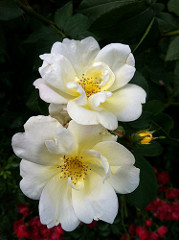

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

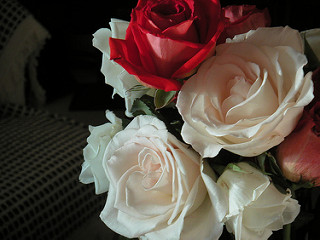

In [6]:
PIL.Image.open(str(roses[1]))

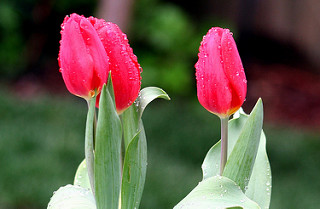

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

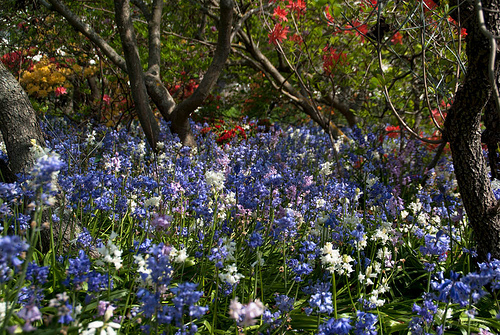

In [8]:
PIL.Image.open(str(tulips[1]))

### Keras 유틸리티를 사용하여 데이터 로드하기

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [13]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### 데이터 시각화하기

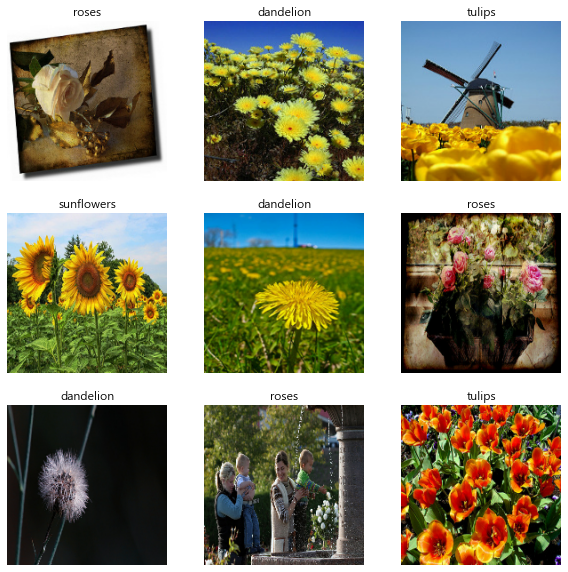

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


### 성능을 높이도록 데이터세트 구성하기

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 데이터 표준화하기

In [22]:
for images, labels in train_ds.take(1):
    print(images, labels)


tf.Tensor(
[[[[5.38345680e+01 4.44944458e+01 1.41666670e+01]
   [5.32731476e+01 4.55962982e+01 1.85879631e+01]
   [5.24280853e+01 4.14716034e+01 1.92108021e+01]
   ...
   [1.04416061e+02 1.01533073e+02 3.26266212e+01]
   [1.08406525e+02 1.09090797e+02 3.95379944e+01]
   [1.15213280e+02 1.19046623e+02 4.09910507e+01]]

  [[5.95814819e+01 4.54592590e+01 1.42370377e+01]
   [5.81611099e+01 4.46305542e+01 1.83833351e+01]
   [5.69879646e+01 4.37212982e+01 2.00027771e+01]
   ...
   [1.18512955e+02 1.16576881e+02 4.66240997e+01]
   [1.20402802e+02 1.21236145e+02 5.12361488e+01]
   [1.25511116e+02 1.29590759e+02 5.14120331e+01]]

  [[6.78503036e+01 4.67839508e+01 1.45061731e+01]
   [6.22500000e+01 4.33055534e+01 1.53657417e+01]
   [6.10817871e+01 4.29706764e+01 1.93611107e+01]
   ...
   [1.26665131e+02 1.26694458e+02 5.48056068e+01]
   [1.28777802e+02 1.29699097e+02 5.96991005e+01]
   [1.32044754e+02 1.36655869e+02 5.82114143e+01]]

  ...

  [[9.89444275e+01 1.12172859e+02 1.76218910e+01]
   [9

In [23]:
normalization_layer = layers.Rescaling(1/255)

In [24]:
normalized_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0
